## pymupdf Practice
-------------------
### Data descriptions
> Data는 대한민국 공공기관 한국지능정보사회진흥원 AI Hub의 아래 데이터를 활용함

  > 1. 본 AI데이터 등을 이용할 때에는 반드시 한국지능정보사회진흥원의 사업결과임을 밝혀야 하며, 본 AI데이터 등을 이용한 2차적 저작물에도 동일하게 밝혀야 합니다.
  
  > 2.국외에 소재하는 법인, 단체 또는 개인이 AI데이터 등을 이용하기 위해서는 수행기관 등 및 한국지능정보사회진흥원과 별도로 합의가 필요합니다.

  > 3.본 AI데이터 등의 국외 반출을 위해서는 수행기관 등 및 한국지능정보사회진흥원과 별도로 합의가 필요합니다.

  > 4.본 AI데이터는 인공지능 학습모델의 학습용으로만 사용할 수 있습니다. 한국지능정보사회진흥원은 AI데이터 등의 이용의 목적이나 방법, 내용 등이 위법하거나 부적합하다고 판단될 경우 제공을 거부할 수 있으며, 이미 제공한 경우 이용의 중지와 AI 데이터 등의 환수, 폐기 등을 요구할 수 있습니다.

  > 5.제공 받은 AI데이터 등을 수행기관 등과 한국지능정보사회진흥원의 승인을 받지 않은 다른 법인, 단체 또는 개인에게 열람하게 하거나 제공, 양도, 대여, 판매하여서는 안됩니다.

  > 6.AI데이터 등에 대해서 제4항에 따른 목적외 이용, 제5항에 따른 무단 열람, 제공, 양도, 대여, 판매 등의 결과로 인하여 발생하는 모든 민・형사 상의 책임은 AI데이터 등을 이용한 법인, 단체 또는 개인에게 있습니다.

  > 7.이용자는 AI 허브 제공 데이터셋 내에 개인정보 등이 포함된 것이 발견된 경우, 즉시 AI 허브에 해당 사실을 신고하고 다운로드 받은 데이터셋을 삭제하여야 합니다.

  > 8.AI 허브로부터 제공받은 비식별 정보(재현정보 포함)를 인공지능 서비스 개발 등의 목적으로 안전하게 이용하여야 하며, 이를 이용해서 개인을 재식별하기 위한 어떠한 행위도 하여서는 안됩니다.

  > 9.향후 한국지능정보사회진흥원에서 활용사례・성과 등에 관한 실태조사를 수행 할 경우 이에 성실하게 임하여야 합니다.

In [2]:
## 필요 패키지 Install needed packages
# !pip install transformers
# !pip install torch torchvision
# !pip install pytesseract
## !pip install cv2  -> 오류발생
# !pip install opencv-python
!pip install pymupdf
!pip install timm
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
    --------------------------------------- 0.1/3.2 MB 656.4 kB/s eta 0:00:05
    --------------------------------------- 0.1/3.2 MB 653.6 kB/s eta 0:00:05
   -- ------------------------------------- 0.2/3.2 MB 1.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/3.2 MB 1.4 MB/s eta 0:00:03
   ----- ---------------------------------- 0.4/3.2 MB 1.7 MB/s eta 0:00:02
   ------- -------------------------------- 0.6/3.2 MB 1.8 MB/s eta 0:00:02
   -------- ------------------------------- 0.7/3.2 MB 1.8 MB/s eta 0:00:02
   ------------ --------------------------- 1.0/3.2 MB 2.4 MB/s eta 0:00:01
   ------------- -------------------------- 1.1/3.2 MB 2.3 MB/s eta 0:00:01
   ----------------- ---------------------- 1.4/3.2 MB 2.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.5/3.2 MB 2.9 MB/s eta 0:00:01
   ------------------ 

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\FT262YU\\AppData\\Local\\anaconda3\\Lib\\site-packages\\torch\\quantization\\quantize.py'
Consider using the `--user` option or check the permissions.



In [12]:
import os
import numpy as np
import pandas as pd
import pymupdf as pypdf

## image 시각화 출력용 패키지
import matplotlib.pyplot as plt
from PIL import Image
import io

strDataFolderPath = os.path.join(os.getcwd(),'..\data')
if os.path.exists(strDataFolderPath) :
    set_default_path(strDataFolderPath)
    print("다음 경로가 유효하며,  기본 경로로 설정함: "+strDataFolderPath)

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\FT262YU\AppData\Local\Temp\ipykernel_19108\2659543492.py:11: SyntaxWarning: invalid escape sequence '\d'
  strDataFolderPath = os.path.join(os.getcwd(),'..\data')


다음 경로가 유효하며,  기본 경로로 설정함: C:\Users\FT262YU\OneDrive - EY\me\system\python\dev\data\..\data


In [7]:
## 해당 경로 파일 목록 보여주기
listData = os.listdir(strDataFolderPath)
print(listData)

## 해당 경로 내 pdf 파일만 추출하기
listPDFData = [file for file in listData if file.lower().endswith('.pdf')]
listPDFData

['(붙임1) 2024년_초거대AI_전략_분야별_데이터_구축방향_240219_f.pdf', '.ipynb_checkpoints', 'HMM_sustainabilty_report_2022(KOR).pdf', 'KAMCO_DAudit_ISP_진단및개선 PT_20231108_vF.pdf', 'KB증권_AI사고예방시스템_제안요청서.pdf', 'OCR_pt_계정신청서_확대.png', 'OCR_pt_손영준_계정신청서.png', 'OCR_pt_여신업권금융사고예방지침.png', 'OCR_pt_하이요.png', 'S3_202404110909251923220.PDF', 'S4_202404110920257739460.PDF', 'S4_202404110921309308630.PDF', '테스트용_프로젝트투입인력제출서류_손영준.pdf']


['(붙임1) 2024년_초거대AI_전략_분야별_데이터_구축방향_240219_f.pdf',
 'HMM_sustainabilty_report_2022(KOR).pdf',
 'KAMCO_DAudit_ISP_진단및개선 PT_20231108_vF.pdf',
 'KB증권_AI사고예방시스템_제안요청서.pdf',
 'S3_202404110909251923220.PDF',
 'S4_202404110920257739460.PDF',
 'S4_202404110921309308630.PDF',
 '테스트용_프로젝트투입인력제출서류_손영준.pdf']

### pdf 파일 Load 후 테스트해보기

In [9]:
### 대상 데이터 목록 짧게 바꾸기
strPDFpptAIStrategy \
,strPDFHMMESGReport \
,strPDFpptAIAuditKAMCO \
,strPDFProjectSign = listPDFData[0], listPDFData[1], listPDFData[2], listPDFData[-1]

In [10]:
import pymupdf as pypdf
## pdf file Open 후 metadata 가져오기
PDFProjectSign = pypdf.open(strPDFProjectSign)
mdPDFProjectSign = PDFProjectSign.metadata

## 첫 페이지 size
size_firstpage = PDFProjectSign[0].rect

## pdf 파일의 기본 및 메타데이터 정보 print
print("해당 pdf 파일의 페이지 개수는 : "+str(PDFProjectSign.page_count)+"장 입니다.")
print("해당 pdf 파일 첫 페이지 size는 "+str(size_firstpage)+"입니다.")
print(f"PDF Title : {mdPDFProjectSign.get('title', 'N/A')}")
print(f"PDF author : {mdPDFProjectSign.get('author', 'N/A')}")
print(f"PDF encryption 여부 : {mdPDFProjectSign.get('encryption', 'N/A')}")

해당 pdf 파일의 페이지 개수는 : 4장 입니다.
해당 pdf 파일 첫 페이지 size는 Rect(0.0, 0.0, 595.0, 842.0)입니다.
PDF Title : CamScanner 2024-06-18 10.52
PDF author : CamScanner
PDF encryption 여부 : None


In [23]:
## Text 추출 및 write 
out = open("output.txt", "wb") # create a text output
for page in PDFProjectSign:
    text = page.get_text().encode('utf-8')
    out.write(text)  ##  추출한 text를 write
    out.write(bytes((12,)))  # write page 구분자(delimiter) (form feed 0x0C)
print(out)
out.close()


<_io.BufferedWriter name='output.txt'>


In [22]:
## page마다 page안의 image 전부 추출/저장해보기
pdfImages = pdf_get_images(PDFProjectSign)
pdfImages

Found 4 images on page 3


[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=595x842>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=595x842>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=595x842>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=595x842>]

In [49]:
## Pixmap 추출
## Pixmap(doc, XREF)
pix = pypdf.Pixmap(PDFProjectSign, listImages[1][0])
pix

Pixmap(DeviceRGB, (0, 0, 2098, 3040), 0)

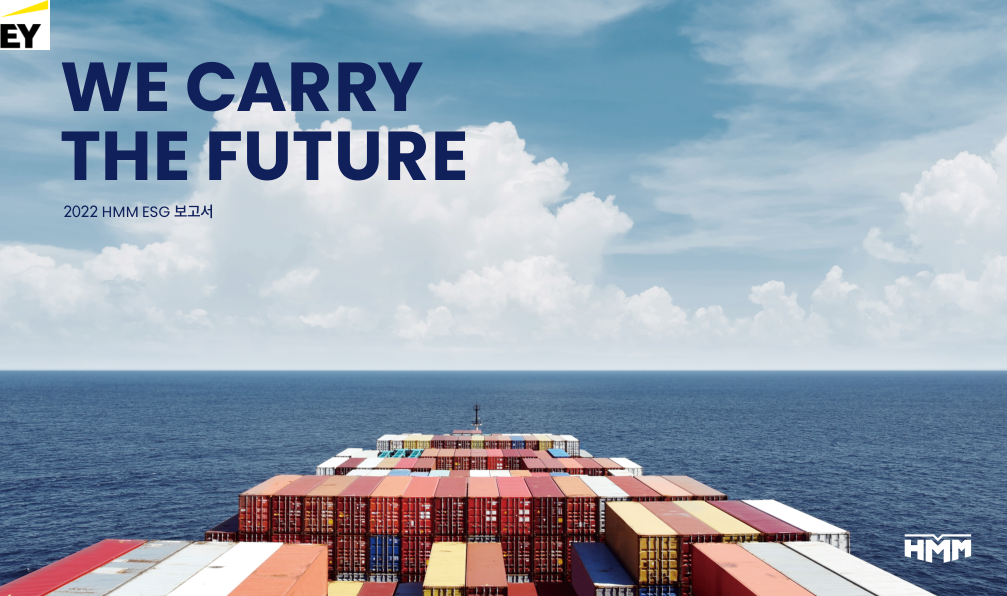

In [36]:
## EY logo image 로드해서 pdf에 넣어보기
## 별도 변수로 저장하는 것이 아니라,  insert_image를 수행하면 해당 page에 그림 insert가 그대로 반영됨
## 그 이후에 pixmap 후 image로 출력

pdfDoc_hmmESGReport = pypdf.open(strPDFHMMESGReport)
pdfDoc_hmmESGReport[0].insert_image(pypdf.Rect(0,0,50,50),filename="EY.png")
reportPage1 = pdfPage2Image(pdfDoc_hmmESGReport[0])
reportPage1

In [38]:
doc = pypdf.open(strPDFProjectSign)  ## 임베딩 할 주문서
doc_toembed = pypdf.open(strPDFProjectSign2)  ## 임베딩으로 넣을 문서
embedded_doc = doc_toembed.tobytes()  ## 문서의 바이트데이터를 버퍼로 변환

In [40]:
doc.embfile_add(strPDFProjectSign2, embedded_doc)

36

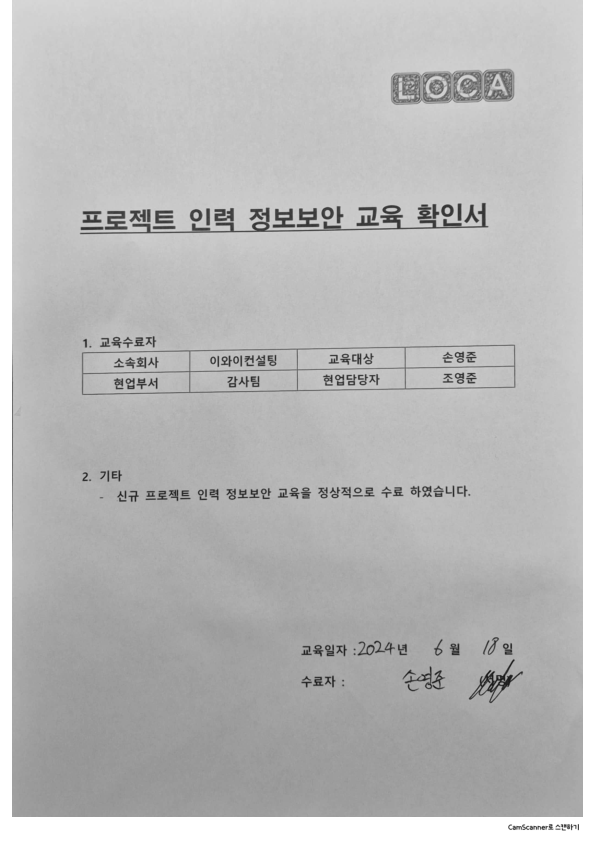

In [43]:
page0 = pdfPage2Image(doc[0])
page0

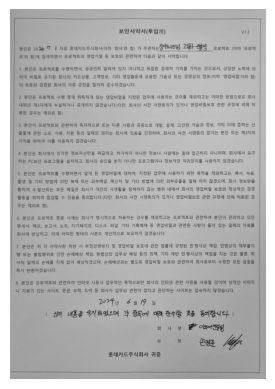

In [51]:
## image 시각화 출력용 패키지
import matplotlib.pyplot as plt
from PIL import Image
import io

## display image
img = pix.tobytes("ppm")
img = Image.open(io.BytesIO(img))  ## imread는 기본적으로 png 파일을 읽도록 설계됨
img2nparray = np.array(img)
plt.imshow(img2nparray)
plt.axis('off')  ## 축 숨기기
plt.show()

### 기본 함수모음

In [4]:
def set_default_path(path):
    # 경로 유효성 확인
    if os.path.isdir(path):
        os.chdir(path)  # 기본 경로 설정
        return True
    else:
        return False

### pymupdf 주요함수

In [25]:
##  pdf 파일 load 후 기본정보 추출하기
def load_pdf(strPDFPath): 
    ## pdf file Open 후 metadata 가져오기
    pdfDoc = pypdf.open(strPDFPath)
    meta_pdfDoc = pdfDoc.metadata

    ## 첫 페이지 size
    size_firstpage = pdfDoc[0].rect

    ## pdf 파일의 기본 및 메타데이터 정보 print
    print("해당 pdf 파일의 페이지 개수는 : "+str(pdfDoc.page_count)+"장 입니다.")
    print("해당 pdf 파일 첫 페이지 size는 "+str(size_firstpage)+"입니다.")
    print(f"PDF Title : {meta_pdfDoc.get('title', 'N/A')}")
    print(f"PDF author : {meta_pdfDoc.get('author', 'N/A')}")
    print(f"PDF encryption 여부 : {meta_pdfDoc.get('encryption', 'N/A')}")


##  pdf page를 image로 transform
##  page -> image
def pdfPage2Image(pdfPage):
    pixmap = pdfPage.get_pixmap()
    img_bytes = pixmap.tobytes("ppm")
    img = Image.open(io.BytesIO(img_bytes))
    
    return img
    
##  pdf page들에서 image 추출하기
def pdf_get_images(pdfDoc):
    listTotalImages = []
    
    ## page별 load 후 저장
    for i, page in enumerate(pdfDoc):
        img = pdfPage2Image(page)
        listTotalImages.append(img)
    
    # pdf page 수를 결과와 함께 print
    print(f"Found {len(listTotalImages)} images on page {i}")
    return listTotalImages

##  pdf에서 text 추출하기
def pdf_get_text(pdfDoc):
    listOutputText = []

    ## page별 load 후 저장
    for i, page in enumerate(pdfDoc):
        text = page.get_text().encode('utf-8')
        listOutputText.append(text)

    return listOutputText